<a href="https://colab.research.google.com/github/yonseimath/data-science-2022-biginner/blob/feature%2FOne/One/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu', padding='same',strides=1)

In [ ]:
keras.layers.MaxPooling2D(2,strides=2,padding='valid')

In [ ]:
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) /255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [ ]:
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [ ]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

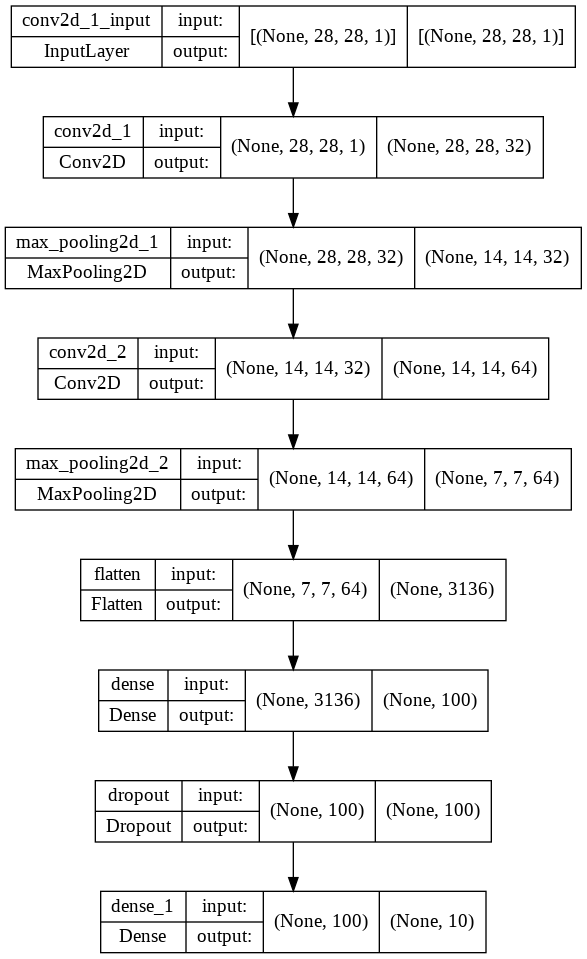

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 131s 87ms/step - loss: 0.5149 - accuracy: 0.8144 - val_loss: 0.3179 - val_accuracy: 0.8813
Epoch 2/20
1500/1500 [==============================] - 128s 86ms/step - loss: 0.3288 - accuracy: 0.8803 - val_loss: 0.2645 - val_accuracy: 0.8998
Epoch 3/20
1500/1500 [==============================] - 125s 83ms/step - loss: 0.2819 - accuracy: 0.8970 - val_loss: 0.2452 - val_accuracy: 0.9082
Epoch 4/20
1500/1500 [==============================] - 126s 84ms/step - loss: 0.2473 - accuracy: 0.9107 - val_loss: 0.2395 - val_accuracy: 0.9104
Epoch 5/20
1500/1500 [==============================] - 126s 84ms/step - loss: 0.2222 - accuracy: 0.9190 - val_loss: 0.2175 - val_accuracy: 0.9183
Epoch 6/20
1500/1500 [==============================] - 127s 85ms/step - loss: 0.2012 - accuracy: 0.9257 - val_loss: 0.2210 - val_accuracy: 0.9216
Epoch 7/20
1500/1500 [==============================] - 127s 85ms/step - loss: 0.1849 - accuracy: 0.9303 - val_loss: 0

In [ ]:
import matplotlib.pyplot as plt

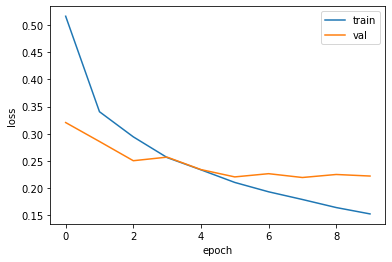

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2195 - accuracy: 0.9229


[0.21945849061012268, 0.9229166507720947]

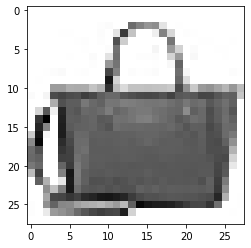

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.6280116e-20 7.2055407e-29 6.3583557e-22 7.7673302e-23 3.3087774e-23
  2.0295275e-20 7.1861150e-19 7.9024457e-24 1.0000000e+00 1.3829870e-22]]


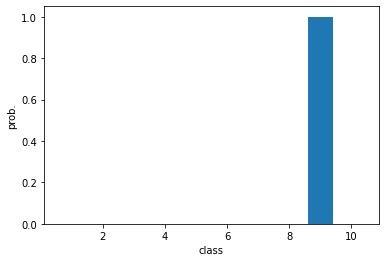

In [ ]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
test_scaled =test_input.reshape(-1,28,28,1)/255.0

In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 4ms/step - loss: 0.2388 - accuracy: 0.9168


[0.23879940807819366, 0.9168000221252441]

In [24]:
model.layers

In [26]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [27]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.033970147 0.2792091


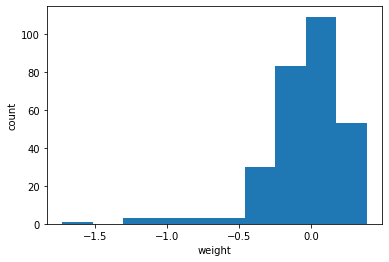

In [28]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

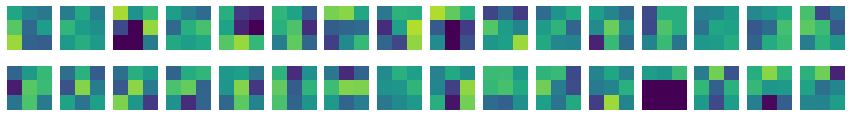

In [30]:
fig, axs =plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [32]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [33]:
no_training_conv =no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [34]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0036695856 0.08387442


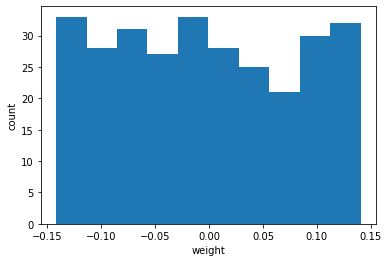

In [35]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

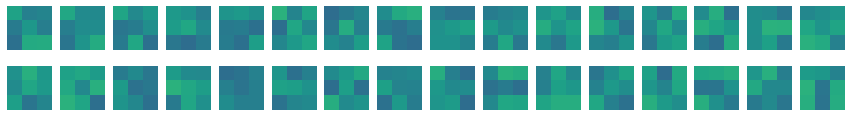

In [36]:
fig, axs = plt.subplots(2,16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin = -0.5, vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [37]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_1_input'), name='conv2d_1_input', description="created by layer 'conv2d_1_input'")


In [38]:
conv_acti = keras.Model(model.input, model.layers[0].output)

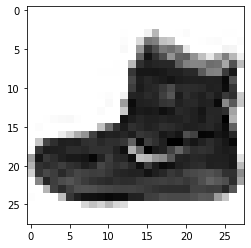

In [39]:
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [40]:
inputs = train_input[0:1].reshape(-1,28,28,1) /255.0
feature_maps = conv_acti.predict(inputs)

In [41]:
print(feature_maps.shape)

(1, 28, 28, 32)


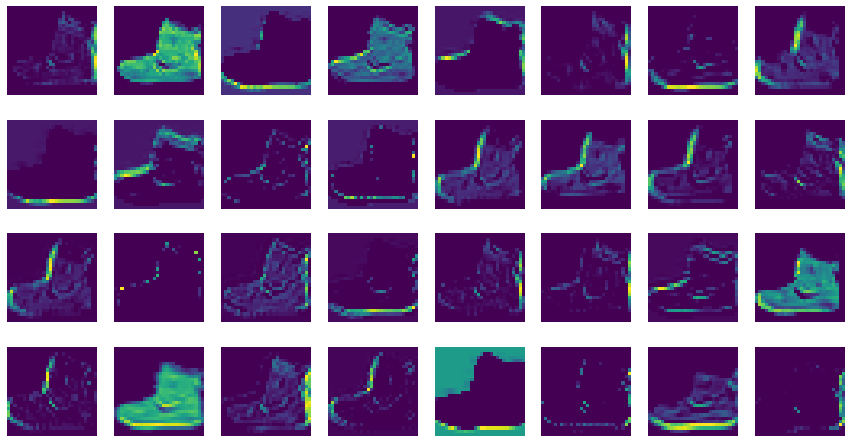

In [42]:
fig, axs = plt.subplots(4,8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()

In [43]:
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

In [44]:
print(feature_maps.shape)

(1, 14, 14, 64)


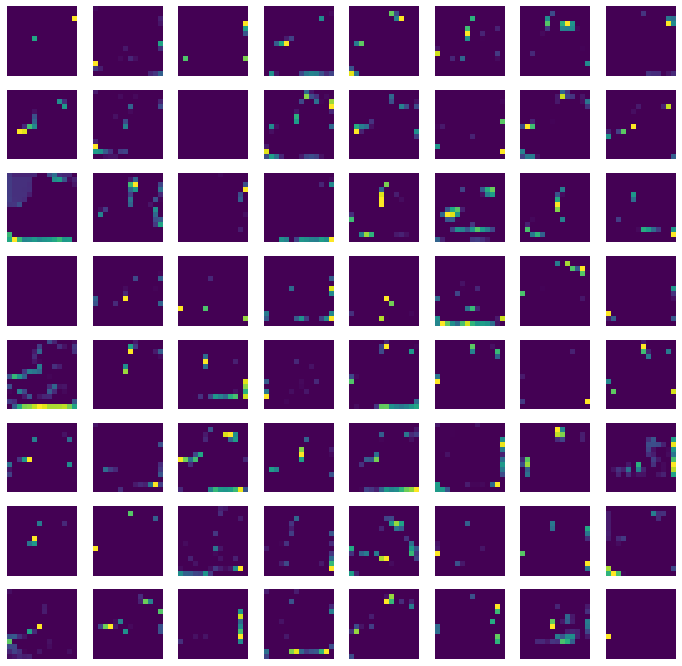

In [45]:
fig, axs = plt.subplots(8,8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i,j].axis('off')
plt.show()